<a href="https://colab.research.google.com/github/GuyProgress/Learning-AI-/blob/main/annEtienne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 09:00:39 2020

@author: Alain ETIENNE, Arts et Métiers
"""

import random as rnd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

def generate_classification_case1(nbpoints, plot = True):
    '''
    Generation of the training set by randomly generating the data (classifier is linear)

    Parameters
    ----------
    nbpoints : integer
        Number of points generated by the function.
    plot : boolean, optional
        Boolean parameters showing or not the input points plot. The default is True.

    Returns
    -------
    t-uple of numpy arrays
        return a couple of numpy arrays containing the input and output of the problem to solve.

    '''
    X = [rnd.random()*2 - 1.0 for _ in range(nbpoints)]
    Y = [rnd.random()*2 - 1.0 for _ in range(nbpoints)]

    inputpoints, expected_outputs = [], []
    goods, bads = [], []

    # This section of the code labels the data on the two classes
    # (to ease the calculous of the prediction error: the first class is labelled 0.0 and the second class is labelled 1.0 )
    for x,y in zip(X,Y):
        inputpoints.append([x,y])
        if x + y > 0:
            expected_outputs.append(1.0)
            goods.append((x,y))
        else:
            expected_outputs.append(0.0)
            bads.append((x,y))
    if plot:
        # Plotting the training population
        plt.figure("Input population - Linear separator")
        plt.scatter([i[0] for i in goods],[i[1] for i in goods],c="green")
        plt.scatter([i[0] for i in bads],[i[1] for i in bads],c = "red")
        plt.plot()

    return np.array(inputpoints), np.array(expected_outputs)

def generate_classification_case2(nbpoints, plot = True):
    '''
    Generation of the training set by randomly generating the data (classifier is non linear)

    Parameters
    ----------
    nbpoints : integer
        Number of points generated by the function.
    plot : boolean, optional
        Boolean parameters showing or not the input points plot. The default is True.

    Returns
    -------
    t-uple of numpy arrays
        return a couple of numpy arrays containing the input and output of the problem to solve.

    '''
    from math import pi

    X = [rnd.random()*2 - 1.0 for _ in range(nbpoints)]
    Y = [rnd.random()*2 - 1.0 for _ in range(nbpoints)]

    inputpoints, expected_outputs = [], []
    goods, bads = [], []

    # This section of the code labels the data on the two classes
    # (to ease the calculous of the prediction error: the first class is labelled 0.0 and the second class is labelled 1.0 )
    for x,y in zip(X,Y):
        inputpoints.append([x,y])
        if x**2 + y**2 > 2/(pi):
            expected_outputs.append(1.0)
            goods.append((x,y))
        else:
            expected_outputs.append(0.0)
            bads.append((x,y))

    if plot:
        # Plotting the training population
        plt.figure("Input population - Non linear separator")
        plt.scatter([i[0] for i in goods],[i[1] for i in goods],c="green")
        plt.scatter([i[0] for i in bads],[i[1] for i in bads],c = "red")
        plt.plot()

    return np.array(inputpoints), np.array(expected_outputs)

def generate_regression_case(nbpoints, noise = 10, plot = True):
    '''
    Generation of a noisy set of point following this function : y =4x^3 -10x -3

    Parameters
    ----------
    nbpoints : integer
        Number of points generated by the function.
    noise : float, optional
        Number in percent represeing the amount of noise to add to the set of points. The default is 10%.
    plot : boolean, optional
        Boolean parameters showing or not the input points plot. The default is True.

    Returns
    -------
    t-uple of numpy arrays
        return a couple of numpy arrays containing the input and output of the problem to solve.

    '''

    my_function = lambda a : 4*a**3 -10*a - 3 + rnd.random()*10*(noise/100)

    X = [rnd.random()*6 - 3.0 for _ in range(nbpoints)]
    Y = [my_function(x) for x in X]

    if plot:
        # Plotting the training population
        plt.title("Input population - Regression")
        plt.scatter(X,Y)
        plt.plot()
        plt.show()

    return np.array(X), np.array(Y)

def load_data_exercice_CamexIA(type_of_problem, KC_to_analyse):
    '''
    This function loads dataset, normalizes them, and split them into 3 sets that it returns as numpy arrays.
    The expected inputs are:
        - the type of problem to solve (CLA for classification and ACP for regression)
        - the Key Caracteristics to analayse (KC4 or KC7)

    Parameters
    ----------
    type_of_problem : string
        the type of problem to solve ("CLA" for classification and "ACP" for regression).
    KC_to_analyse : string
        Key Caracteristics to analayse ("KC4" or "KC7").

    Returns
    -------
    inputs_train : numpy array
        input dataset to use for the training of the network.
    outputs_train : numpy array
        output dataset to use for the training of the network.
    inputs_test : numpy array
        input dataset to use for testing the network
    outputs_test : numpy array
        output dataset to use for testing the network.
    heads : numpy array
        list of the labls of the input dataset.
    '''

    if type_of_problem not in ["CLA, ACP"] and KC_to_analyse not in ["KC4","KC7"]:
        print("The input parameters are not well set. Aborted")
        return None

    # Data loading from CSV file
    import pandas as pd
    data = pd.read_csv("/content/sample_data/factory_process_ACP_KC4.csv".format(type_of_problem, KC_to_analyse), sep = ";", header = 0)
    heads = data.columns.values
    data = data.to_numpy()

    # Extraction of input/output data for the detection of default case
    outputs, inputs = data[:,-1], data[:,0:-1]

    # Data normalizing (to avoid having too relative hueg parameters regarding others)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs = scaler.transform(inputs)

    # Datasets allocation between trainig and testing sets
    from sklearn.model_selection import train_test_split
    inputs_train, inputs_test, outputs_train, outputs_test, = train_test_split(inputs, outputs, test_size = 0.05, random_state = 42)

    return inputs_train, outputs_train, inputs_test, outputs_test, heads

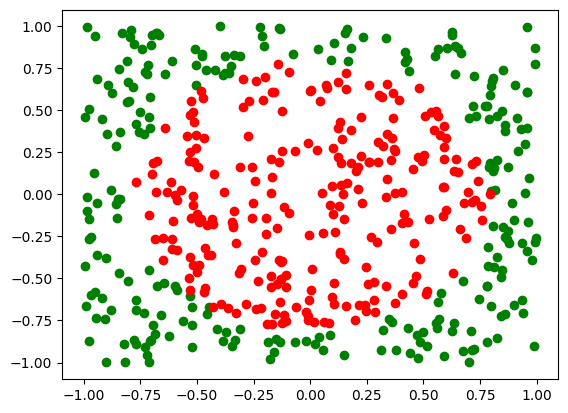

In [ ]:
inputpoints, expected_outputs = generate_classification_case2(500, True)

In [ ]:

# TODO: Définition de la structure du réseau adaptée au problème et à la structure de données

mynetwork = Sequential()
# TODO: Contrôler et vérifier la structure du réseau
mynetwork.add(Dense(4, input_dim = 2, activation = "relu"))
mynetwork.add(Dense(1, activation = 'sigmoid'))
mynetwork.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

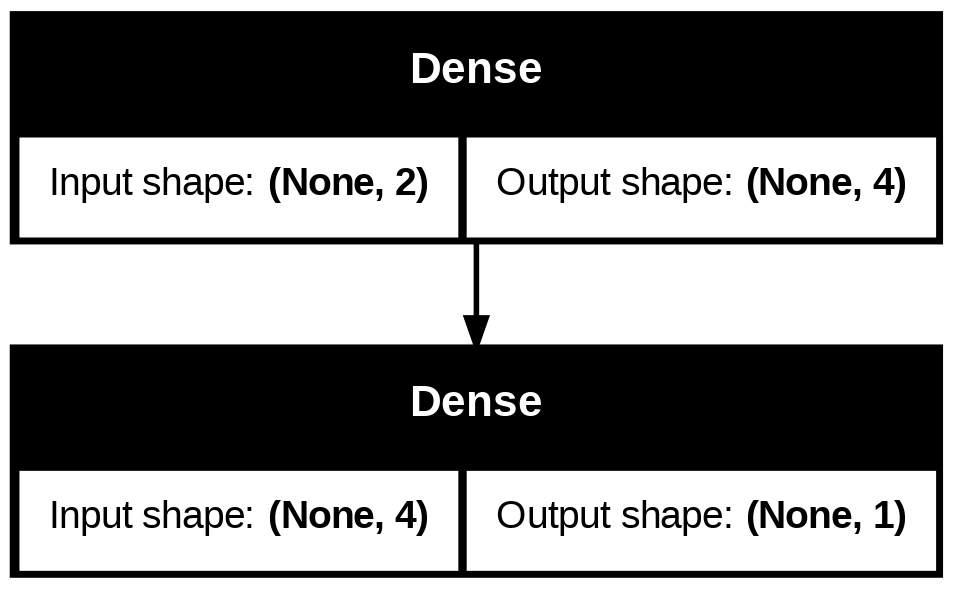

In [ ]:
plot_model(mynetwork,to_file='model_plot.png', show_shapes=True)

In [ ]:
# TODO: Definir les paramètres d'optimisation
op_params = SGD(0.05)
mynetwork.compile(loss='binary_crossentropy', optimizer= op_params, metrics=['binary_accuracy'])

In [ ]:
# TODO: Definir et executer l'entrainement
my_history = mynetwork.fit(inputpoints, expected_outputs, epochs = 400, batch_size = 20, validation_split = 0.15)



Epoch 1/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - binary_accuracy: 0.5625 - loss: 0.6763 - val_binary_accuracy: 0.7200 - val_loss: 0.6462
Epoch 2/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.6411 - loss: 0.6499 - val_binary_accuracy: 0.6533 - val_loss: 0.6381
Epoch 3/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6827 - loss: 0.6462 - val_binary_accuracy: 0.6667 - val_loss: 0.6339
Epoch 4/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6728 - loss: 0.6498 - val_binary_accuracy: 0.6933 - val_loss: 0.6306
Epoch 5/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6830 - loss: 0.6433 - val_binary_accuracy: 0.6667 - val_loss: 0.6269
Epoch 6/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7097 - loss: 0.6346 - val_binary_accuracy: 0.6667 - val_loss: 0.6235
Epoch 7/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6987 - loss: 0.6338 - val_binary_accuracy: 0.7200 - val_loss: 0.6198
Epoch 8/400


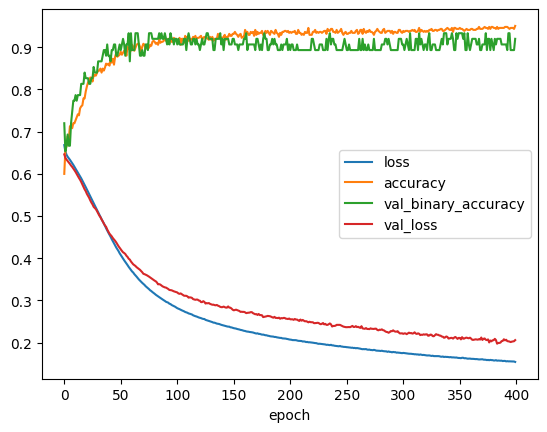

In [ ]:
# TODO: Tracer l'évolution de la fonction perte au cours de l'optimisation (entrainement)
plt.figure("Evolution of loss and accuracy during the training")
plt.plot(my_history.history['loss'], label="loss")
plt.plot(my_history.history['binary_accuracy'], label="accuracy")
plt.plot(my_history.history['val_binary_accuracy'], label="al_binary_accuracy")
plt.plot(my_history.history['val_loss'], label="val_loss")
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', "val_binary_accuracy" , "val_loss"], loc='right')
plt.show()

# TODO: Générer un jeu d'essai et de test pour voir la prédiction du système

In [ ]:
from sklearn.metrics import confusion_matrix

def predict_classes(inputpoints):
  j = mynetwork.predict(inputpoints)
  predictions = [0.0 if i <0.5 else 1.0 for i in j]
  return predictions

predictions = predict_classes(inputpoints)

c = confusion_matrix(expected_outputs, predictions)
print(c)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[236  15]
 [ 12 237]]


In [ ]:
print(my_history.history.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


In [ ]:
mynetwork.save("mynetwork.keras")

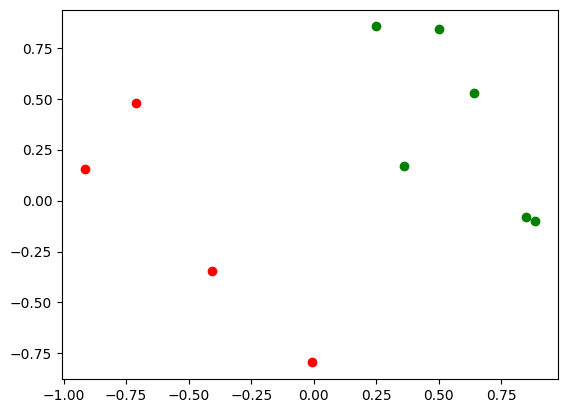

In [ ]:
testX , testY = generate_classification_case1(10)

In [ ]:
testX

array([[ 0.24848606,  0.85451477],
       [ 0.35933116,  0.17156184],
       [ 0.88577141, -0.10134935],
       [-0.70886466,  0.4787442 ],
       [ 0.63879575,  0.52963477],
       [ 0.8489305 , -0.07863708],
       [-0.00877815, -0.79438049],
       [ 0.49923265,  0.84242584],
       [-0.91620014,  0.15690648],
       [-0.40540085, -0.34468902]])

In [ ]:
TESTY = mynetwork.predict(testX)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
TESTY

array([[0.8726456 ],
       [0.00196574],
       [0.9188785 ],
       [0.48789188],
       [0.5496583 ],
       [0.8579441 ],
       [0.39136866],
       [0.8412875 ],
       [0.7056256 ],
       [0.05174021]], dtype=float32)

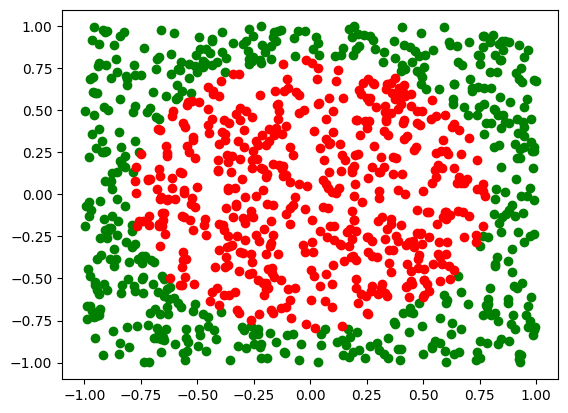

In [ ]:
textX2 = generate_classification_case2(1000)

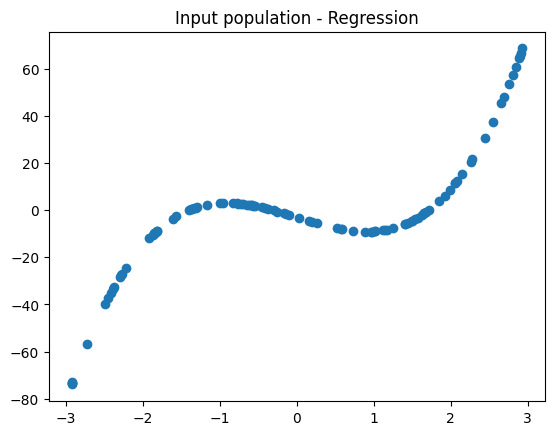

In [ ]:
inputpoints_regression , expected_outputs_regression = generate_regression_case(100 , 0 , True)

In [ ]:
regressor = Sequential()
regressor.add(Dense(4, input_dim = 1, activation = "linear"))
regressor.add(Dense(1, activation = 'linear'))
regressor.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

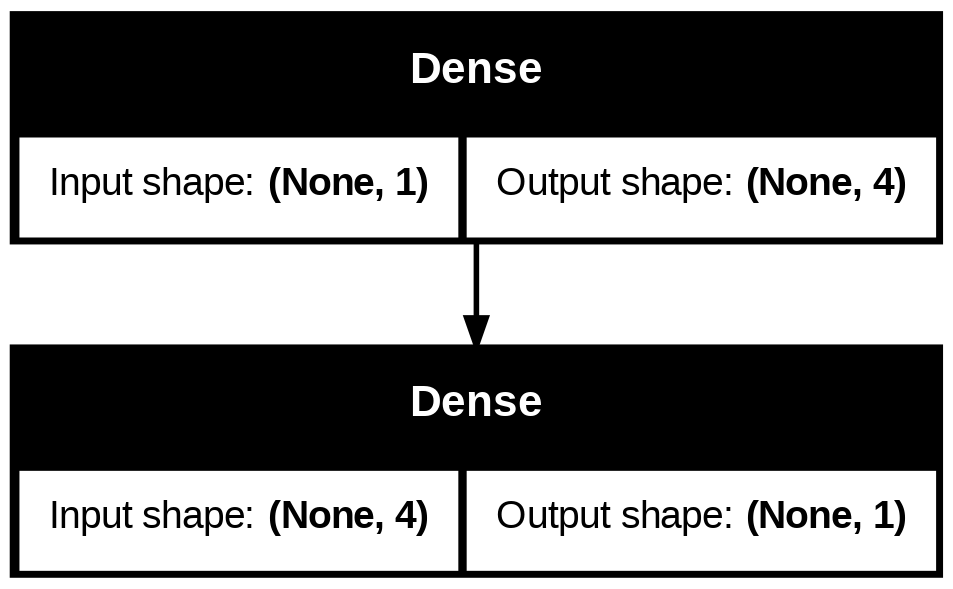

In [ ]:
plot_model(regressor,to_file='model_plot.png', show_shapes=True)

In [ ]:
op_params = SGD(0.1)
regressor.compile(loss='mean_absolute_error', optimizer= op_params, metrics=[tf.metric])

In [ ]:
my_history1 = regressor.fit(inputpoints_regression, expected_outputs_regression, epochs = 400, batch_size = 20, validation_split = 0.15)

Epoch 1/400


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.